In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import warnings

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore') 

from src import crs, PublicPredictor
from src.dbc import utils
from IPython.display import clear_output

In [3]:
# 1. load_excel
data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
p, m = crs.utils.data_preprocessing(xlsx)

m.set_index("month", inplace=True)

# 3. data init
_month = 1

month_df = pd.DataFrame(m.loc[_month])
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']

PUBLIC_PERCENTAGE = 30
APT = crs.utils.get_APT(month_df, PUBLIC_PERCENTAGE)

calc = crs.models.ManagementOffice(
        month=_month,
        households=month_df,
        APT=APT,
        contract="단일계약"
    )
apt = calc.apart

In [11]:
m_15 = utils.data_preprocessing(xlsx)

df = utils.dimension_reduction(m_15)
m_60 = df.copy()

m_60.head()

m_60_1 = m_60[m_60.index.month == 1].copy()
m_60_1.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2019-01-01 00:00:00,0.033,0.000,0.034,0.037,0.062,0.322,0.240,0.295,0.373,0.243,...,0.534,0.188,0.400,0.318,0.420,0.626,0.484,0.289,0.305,0.652
2019-01-01 01:00:00,0.048,0.000,0.033,0.037,0.063,0.185,0.257,0.397,0.257,0.228,...,0.396,0.434,0.355,0.250,0.465,0.409,0.459,0.336,0.332,0.557
2019-01-01 02:00:00,0.032,0.000,0.039,0.036,0.062,0.175,0.384,0.353,0.123,0.141,...,0.194,0.337,0.379,0.274,0.326,0.307,0.405,0.382,0.311,0.491
2019-01-01 03:00:00,0.033,0.000,0.039,0.037,0.062,0.167,0.276,0.488,0.142,0.159,...,0.286,0.263,0.375,0.264,0.336,0.345,0.298,0.291,0.261,0.511
2019-01-01 04:00:00,0.032,0.001,0.033,0.037,0.063,0.197,0.266,0.278,0.190,0.227,...,0.275,0.245,0.310,0.423,0.360,0.364,0.212,0.347,0.294,0.507


## 1. ECV

In [16]:
from src import SavingFeedback

sf = SavingFeedback(xlsx, _type="kmeans")
tdsf = SavingFeedback(xlsx, _type="tdkmeans")

sf.select_month(1)
sf.kmeans_run()

tdsf.select_month(1)
tdsf.kmeans_run()

clear_output(wait=True)

ECV : 51 %
1/248 - ECV:84%
11/248 - ECV:78%
21/248 - ECV:86%
31/248 - ECV:88%
41/248 - ECV:86%
51/248 - ECV:82%
61/248 - ECV:86%
71/248 - ECV:85%
81/248 - ECV:88%
91/248 - ECV:83%
101/248 - ECV:86%
111/248 - ECV:82%
121/248 - ECV:89%
131/248 - ECV:80%
141/248 - ECV:85%
151/248 - ECV:88%
161/248 - ECV:88%
171/248 - ECV:76%
181/248 - ECV:82%
191/248 - ECV:82%
201/248 - ECV:88%
211/248 - ECV:81%
221/248 - ECV:84%
231/248 - ECV:80%
241/248 - ECV:87%
248/248 - ECV:86%


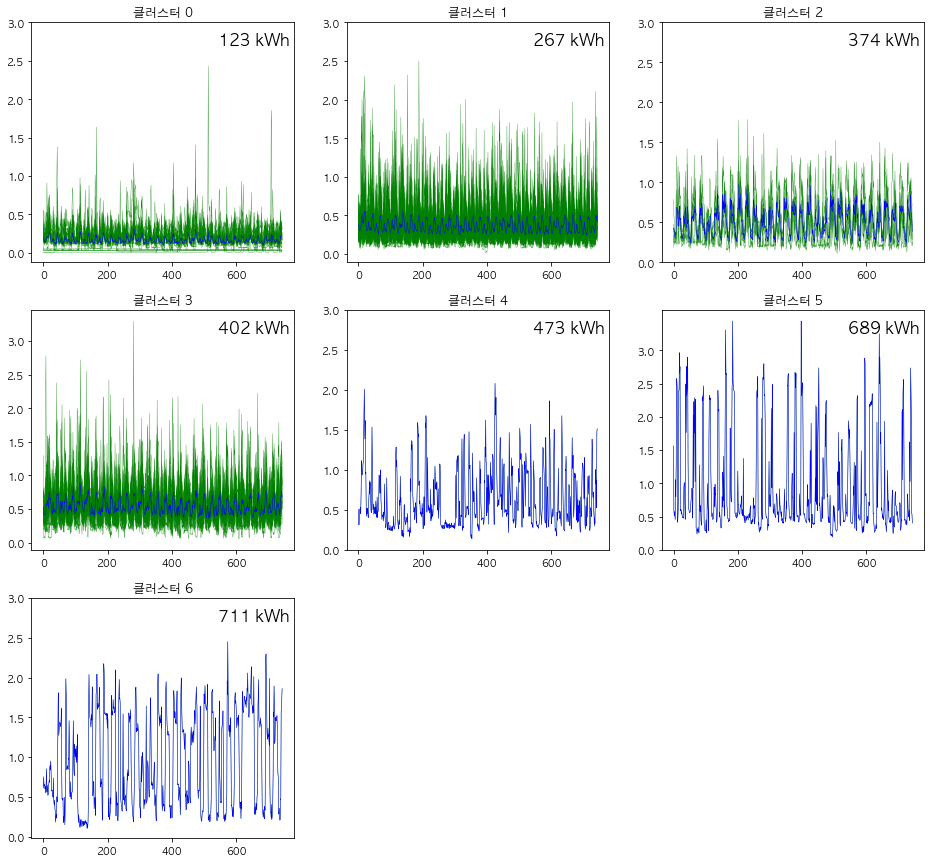

In [17]:
sf.kmeans.draw_plot()

0.40958155246307426


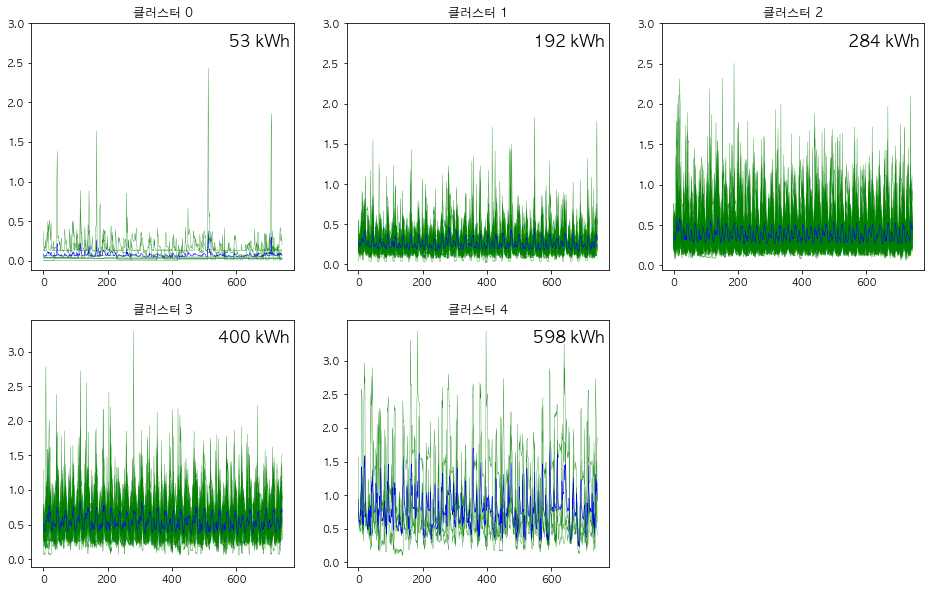

In [18]:
print(tdsf.kmeans.kmeans.ecv)
tdsf.kmeans.draw_plot()

In [28]:
tdsf.kmeans.kmeans.wss

0 51.72438050000004 8
1 263.4374626086966 23
2 1133.6288137826066 46
3 956.1515774074057 27
4 621.5795474999982 4


3026.5217817987073

In [45]:
copy = tdsf.kmeans.cluster_info.copy()

copy.loc['최종 기여도 그룹'] = tdsf.kmeans.labels_

copy[copy.columns[:8]]

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402
division_round,,,,,,,,
0,0,0,0,0,0,1,1,2
1,1,0,1,1,1,2,3,3
2,0,0,0,0,0,1,1,2
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...
244,0,0,0,1,0,2,2,2
245,0,0,0,1,0,1,1,1
246,0,0,0,1,0,1,2,2


In [75]:
copy[copy.columns[copy.sum().values.argsort()[-2]]].value_counts()

3    60
6    58
4    56
5    41
2    32
1     2
Name: 아파트1-101-104, dtype: int64

In [76]:
month_df.iloc[month_df['usage (kWh)'].values.argsort()[-2]]

name           아파트1-101-104
usage (kWh)             689
Name: 1, dtype: object

In [69]:
month_df['usage (kWh)'].argsort()

0       98
1       90
2       95
3      100
4       94
      ... 
103     20
104     47
105     84
106      1
107     46
Name: usage (kWh), Length: 108, dtype: int64

In [79]:
tdsf.kmeans.labels_[copy.sum().values.argsort()[-1]]

4

In [89]:
sf.group[sf.group['label'] == 4]

,name,usage (kWh),label
35,아파트1-101-704,473,4


In [98]:
import random as ran

outlier_chk_sf = np.array([])
outlier_chk_tdsf = np.array([])

for case in range(0,100):    
    print("case",case)
    test_m = m_60_1.sample(n=ran.randrange(50, len(m_60_1.columns)), axis=1).copy()
    
    sf = SavingFeedback(xlsx, _type="kmeans")
    sf.select_month(1)
    sf.kmeans_run()

    clear_output(wait=True)

    tdsf = SavingFeedback(xlsx, _type="tdkmeans")
    tdsf.select_month(1)
    tdsf.kmeans_run()

    clear_output(wait=True)
    
    chk_out = sf.group['label'].value_counts()
    outlier_chk_sf = np.append(outlier_chk_sf, chk_out[chk_out == 1].size)
    
    chk_out = tdsf.group['label'].value_counts()
    outlier_chk_tdsf = np.append(outlier_chk_tdsf, chk_out[chk_out == 1].size)

1/248 - ECV:85%
11/248 - ECV:80%
21/248 - ECV:85%
31/248 - ECV:88%
41/248 - ECV:86%
51/248 - ECV:82%
61/248 - ECV:88%
71/248 - ECV:85%
81/248 - ECV:88%
91/248 - ECV:83%
101/248 - ECV:86%
111/248 - ECV:82%
121/248 - ECV:88%
131/248 - ECV:78%
141/248 - ECV:85%
151/248 - ECV:88%
161/248 - ECV:88%
171/248 - ECV:79%
181/248 - ECV:82%
191/248 - ECV:83%
201/248 - ECV:88%
211/248 - ECV:80%
221/248 - ECV:83%
231/248 - ECV:80%
241/248 - ECV:87%
248/248 - ECV:86%


In [29]:
from src import SavingFeedback

sf_ran_test = pd.DataFrame(index=m_60_1.columns)
tdsf_ran_test = pd.DataFrame(index=m_60_1.columns)

for case in range(1, 101):
    sf = SavingFeedback(xlsx, _type="kmeans")
    tdsf = SavingFeedback(xlsx, _type="tdkmeans")

    sf.select_month(1)
    sf.kmeans_run()

    clear_output(wait=True)
    
    tdsf.select_month(1)
    tdsf.kmeans_run()
    
    clear_output(wait=True)

    sf_ran_test["CASE {}".format(case)] = sf.kmeans.labels_.astype("int")
    tdsf_ran_test["CASE {}".format(case)] = tdsf.kmeans.labels_.astype("int")

1/248 - ECV:85%
11/248 - ECV:78%
21/248 - ECV:86%
31/248 - ECV:86%
41/248 - ECV:86%
51/248 - ECV:83%
61/248 - ECV:88%
71/248 - ECV:85%
81/248 - ECV:88%
91/248 - ECV:82%
101/248 - ECV:86%
111/248 - ECV:82%
121/248 - ECV:88%
131/248 - ECV:77%
141/248 - ECV:83%
151/248 - ECV:87%
161/248 - ECV:84%
171/248 - ECV:79%
181/248 - ECV:82%
191/248 - ECV:81%
201/248 - ECV:88%
211/248 - ECV:81%
221/248 - ECV:84%
231/248 - ECV:80%
241/248 - ECV:87%
248/248 - ECV:86%


In [37]:
sf_ran_test.std(axis=1).max()

0.9877532918986227

In [38]:
tdsf_ran_test.std(axis=1).max()

0.4988876515698589

In [27]:
test = sf_ran_test.sample(n=2)

test

,CASE 1,CASE 2,CASE 3,CASE 4,CASE 5,CASE 6,CASE 7,CASE 8,CASE 9
아파트1-103-1502,2,2,1,1,2,0,4,2,2
아파트1-103-1402,0,1,0,0,0,0,1,1,0


In [28]:
test.std(axis=1)

아파트1-103-1502    1.092906
아파트1-103-1402    0.500000
dtype: float64

In [6]:
np.std([5,5])

0.0

In [106]:
outlier_chk_sf.max()

6.0

In [94]:
chk_out = tdsf.group['label'].value_counts()
chk_out[chk_out == 1].size

0

In [48]:
from src import SavingFeedback
import random as ran

wm_anomalies = np.array([])
m_anomalies = np.array([])

for case in range(0,100):    
    test_m = m_60_1.sample(n=ran.randrange(50, len(m_60_1.columns)), axis=1).copy()
    
    wm_sf = SavingFeedback(xlsx, _type="tdkmeans")
    wm_sf.select_month(1)
    wm_sf.kmeans_run()

    clear_output(wait=True)

    m_sf = SavingFeedback(xlsx, _type="tdkmeans", _tdtype="mean")
    m_sf.select_month(1)
    m_sf.kmeans_run()

    clear_output(wait=True)
    
    wm_anomalies = np.append(wm_anomalies, len(wm_sf.check_anomaly()))
    m_anomalies = np.append(m_anomalies, len(m_sf.check_anomaly()))

1/248 - ECV:85%
11/248 - ECV:79%
21/248 - ECV:85%
31/248 - ECV:88%
41/248 - ECV:88%
51/248 - ECV:82%
61/248 - ECV:88%
71/248 - ECV:85%
81/248 - ECV:88%
91/248 - ECV:82%
101/248 - ECV:86%
111/248 - ECV:82%
121/248 - ECV:88%
131/248 - ECV:77%
141/248 - ECV:85%
151/248 - ECV:87%
161/248 - ECV:88%
171/248 - ECV:79%
181/248 - ECV:82%
191/248 - ECV:83%
201/248 - ECV:88%
211/248 - ECV:81%
221/248 - ECV:84%
231/248 - ECV:80%
241/248 - ECV:88%
248/248 - ECV:86%


In [50]:
print(wm_anomalies.min(), m_anomalies.min())
print(wm_anomalies.mean(), m_anomalies.mean())
print(wm_anomalies.max(), m_anomalies.max())

0.0 0.0
1.04 2.04
3.0 6.0


In [49]:
from src import SavingFeedback
import random as ran

anomalies = np.array([])
m_2_anomalies = np.array([])

for case in range(0,100):    
    test_m = m_60_1.sample(n=ran.randrange(50, len(m_60_1.columns)), axis=1).copy()
    
    wm_sf = SavingFeedback(xlsx)
    wm_sf.select_month(1)
    wm_sf.kmeans_run()

    clear_output(wait=True)

    m_sf = SavingFeedback(xlsx, _type="tdkmeans", _tdtype="mean")
    m_sf.select_month(1)
    m_sf.kmeans_run()

    clear_output(wait=True)
    
    anomalies = np.append(anomalies, len(wm_sf.check_anomaly()))
    m_2_anomalies = np.append(m_2_anomalies, len(m_sf.check_anomaly()))

1/248 - ECV:85%
11/248 - ECV:78%
21/248 - ECV:85%
31/248 - ECV:87%
41/248 - ECV:86%
51/248 - ECV:83%
61/248 - ECV:88%
71/248 - ECV:85%
81/248 - ECV:88%
91/248 - ECV:83%
101/248 - ECV:86%
111/248 - ECV:82%
121/248 - ECV:89%
131/248 - ECV:79%
141/248 - ECV:85%
151/248 - ECV:86%
161/248 - ECV:88%
171/248 - ECV:79%
181/248 - ECV:82%
191/248 - ECV:82%
201/248 - ECV:88%
211/248 - ECV:81%
221/248 - ECV:84%
231/248 - ECV:81%
241/248 - ECV:87%
248/248 - ECV:86%


In [51]:
print(anomalies.min(), m_2_anomalies.min())
print(anomalies.mean(), m_2_anomalies.mean())
print(anomalies.max(), m_2_anomalies.max())

0.0 1.0
12.16 2.21
34.0 5.0


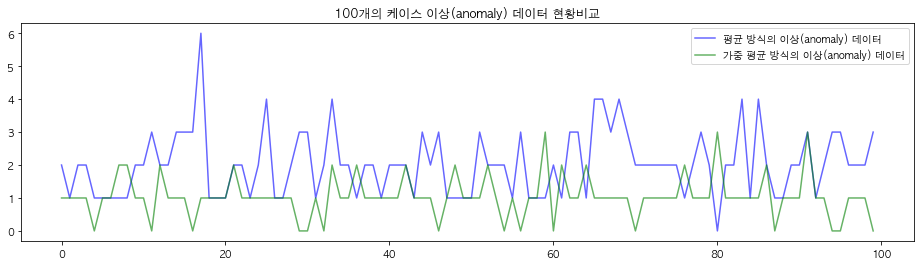

In [63]:
plt.figure(figsize=(16,4))



plt.plot(m_anomalies, color='b', alpha=0.6, label="평균 방식의 이상(anomaly) 데이터")
plt.plot(wm_anomalies,color='g', alpha=0.6, label="가중 평균 방식의 이상(anomaly) 데이터")
plt.title("100개의 케이스 이상(anomaly) 데이터 현황비교")

plt.legend(loc='upper right')
plt.show()